# Cleaning US Census Data

You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple `csv` files. They didn't use pandas, they would just look through these `csv` files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into `pandas` and into reasonable shape so that you can make these histograms?

## Inspect the Data!

1. The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

   Open some of the census `csv` files that came with the kit you downloaded. How are they named? What kind of information do they hold? Will they help us make this graph?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


2. It will be easier to inspect this data once we have it in a DataFrame. You can't even call `.head()` on these `csv`s! How are you supposed to read them?

   Using `glob`, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like `us_census`.

In [4]:
import glob

files=glob.glob('states*.csv')

data_list = [] 

for filename in files:
    data=pd.read_csv(filename)
    data_list.append(data)
    us_census = pd.concat(data_list)
print(us_census.head())

   Unnamed: 0       State  TotalPop Hispanic   White   Black  Native   Asian  \
0           0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   
1           1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   
2           2     Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   
3           3    Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   
4           4  California  38421464   37.29%  40.22%   5.68%   0.41%  13.05%   

  Pacific       Income            GenderPop  
0   0.03%  $43,296.36     2341093M_2489527F  
1   1.06%  $70,354.74       384160M_349215F  
2   0.17%  $54,207.82     3299088M_3342840F  
3   0.15%  $41,935.63     1451913M_1506295F  
4   0.35%  $67,264.78   19087135M_19334329F  


3. Look at the `.columns` and the `.dtypes` of the `us_census` DataFrame. Are those datatypes going to hinder you as you try to make histograms?

In [6]:
print(us_census.columns)
print(us_census.dtypes)
print(us_census.sample(n=5))

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')
Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object
   Unnamed: 0       State  TotalPop Hispanic   White   Black Native  Asian  \
2           2    Delaware    926454    8.82%  64.63%  20.74%  0.26%  3.27%   
0           0  New Jersey   8904413   18.75%  56.49%  14.39%  0.12%  8.16%   
2           2       Idaho   1616547   11.51%  83.14%   0.57%  1.47%  1.14%   
2           2    Nebraska   1869365    9.20%  81.14%   4.96%  0.86%  1.86%   
2           2    New York  19673174   17.24%  56.47%  15.67%  0.32%  7.90%   

  Pacific       Income           GenderPop  
2     NaN  $61,827.98      448413M_478041F  
0   0.03%  $76,581.08    4343027M_4561386

4. Look at the `head()` of the DataFrame so that you can understand why some of these `dtypes` are objects instead of integers or floats.

   Start to make a plan for how to convert these columns into the right types for manipulation.

### Data Manipulation Plan for Type Conversion

- Remove unnecessary columns like `Unnamed: 0`
- Rename columns to meaningful and consistent lowercase names
- Clean the `Income` column by removing `$` and `,` characters, then convert to float
- - Split `GenderPop` column into two columns: `Male` and `Female`
  - Remove trailing `M` and `F` characters
  - Convert these new columns to integers
- Convert percentage columns (`Hispanic`, `White`, `Black`, `Native`, `Asian`, `Pacific`) from string percentages to float by removing `%`
- Handle missing or malformed data using error coercion or filling missing values
- Verify and validate data types to ensure correct format for analysis



In [7]:
#Remove unnecessary columns like Unnamed: 0
us_census = us_census.drop(columns=['Unnamed: 0'], errors='ignore')


In [31]:
#Rename columns to meaningful and consistent lowercase names
us_census.columns = ['state','totalpop','hispanic','white','black','native','asian','pasific','income','genderpop']


In [27]:
print(us_census.head())

        state  totalpop hispanic   white   black  native   asian pasific  \
0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   0.03%   
1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   1.06%   
2     Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   0.17%   
3    Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   0.15%   
4  California  38421464   37.29%  40.22%   5.68%   0.41%  13.05%   0.35%   

     income      male    female  
0  43296.36   2341093   2489527  
1  70354.74    384160    349215  
2  54207.82   3299088   3342840  
3  41935.63   1451913   1506295  
4  67264.78  19087135  19334329  


## Regex to the Rescue

5. Use regex to turn the `Income` column into a format that is ready for conversion into a numerical type.

In [14]:
#Clean the `income` column by removing `$` and `,` characters, then convert to float
us_census['income'] = us_census['income'].replace('[\$,]', '', regex=True).astype(float)
print(us_census.head())

        state  totalpop hispanic   white   black  native   asian pasific  \
0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   0.03%   
1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   1.06%   
2     Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   0.17%   
3    Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   0.15%   
4  California  38421464   37.29%  40.22%   5.68%   0.41%  13.05%   0.35%   

     income            genderpop  
0  43296.36    2341093M_2489527F  
1  70354.74      384160M_349215F  
2  54207.82    3299088M_3342840F  
3  41935.63    1451913M_1506295F  
4  67264.78  19087135M_19334329F  


6. Look at the `GenderPop` column. We are going to want to separate this into two columns, the `Men` column, and the `Women` column.

   Split the column into those two new columns using `str.split` and separating out those results.

In [39]:
#Split `genderpop` column into two columns: `Male` and `Female`
if 'genderpop' in us_census.columns:
    gender = us_census['genderpop'].str.split('_', expand=True)
# delete genderpop column
us_census = us_census.drop(columns=['genderpop'], errors = 'ignore')
us_census.head()

,state,totalpop,hispanic,white,black,native,asian,pasific,income,male,female
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,2341093,2489527
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160,349215
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,3299088,3342840
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,1451913,1506295
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,19087135,19334329


7. Convert both of the columns into numerical datatypes.

   There is still an `M` or an `F` character in each entry! We should remove those before we convert.

In [34]:
us_census['male'] = pd.to_numeric(gender[0].str.replace('M',''), errors= 'coerce').astype('Int64')
us_census['female'] = pd.to_numeric(gender[1].str.replace('F',''), errors = 'coerce').astype('Int64')
us_census.head()

,state,totalpop,hispanic,white,black,native,asian,pasific,income,male,female
0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2341093,2489527
1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,384160,349215
2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3299088,3342840
3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,1451913,1506295
4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,19087135,19334329


In [37]:
#Convert percentage columns (`Hispanic`, `White`, `Black`, `Native`, `Asian`, `Pacific`) from string percentages to float by removing `%`
etnics=['hispanic', 'white', 'black', 'native', 'asian', 'pasific']
for etnic in etnics:
    us_census[etnic] = pd.to_numeric(us_census[etnic].replace('%','', regex = True), errors = 'coerce').astype(float)
us_census.head()

,state,totalpop,hispanic,white,black,native,asian,pasific,income,male,female
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,2341093,2489527
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160,349215
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,3299088,3342840
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,1451913,1506295
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,19087135,19334329


In [41]:
#Handle missing or malformed data using error coercion or filling missing values
print(us_census.isnull().sum())

state       0
totalpop    0
hispanic    0
white       0
black       0
native      0
asian       0
pasific     5
income      0
male        0
female      3
dtype: int64


In [45]:
# fill missing data with mean value in pasific column
us_census['pasific'] = us_census['pasific'].fillna(us_census['pasific'].mean())

# delete mising data in female column
us_census = us_census[us_census['female'].notna()]

# Eksik değer kontrolü
print(us_census.isnull().sum())

state       0
totalpop    0
hispanic    0
white       0
black       0
native      0
asian       0
pasific     0
income      0
male        0
female      0
dtype: int64


8. Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you've wasted your whole day cleaning your data with no results to show!

   Use matplotlib to make a scatterplot!
   
   ```py
   plt.scatter(the_women_column, the_income_column)
   ```
   
   Remember to call `plt.show()` to see the graph!

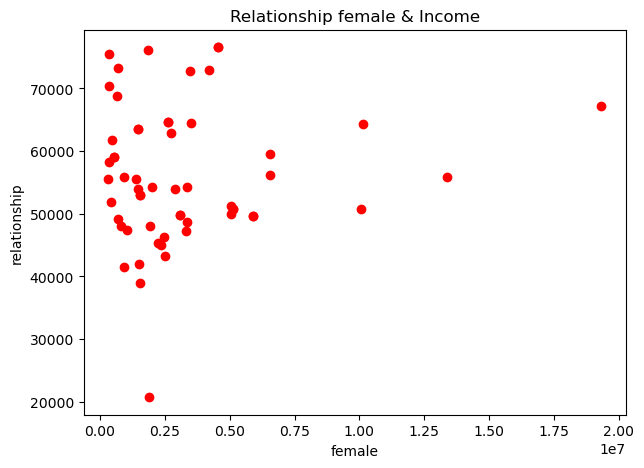

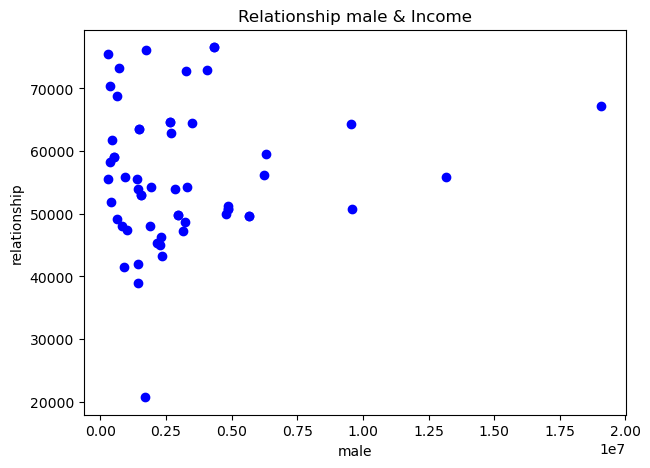

In [49]:
plt.figure(figsize=(7,5))
plt.scatter(us_census['female'], us_census['income'], color = 'red')
plt.title('Relationship Female & Income')
plt.xlabel('female')
plt.ylabel('relationship')
plt.show()

plt.figure(figsize=(7,5))
plt.scatter(us_census['male'], us_census['income'], color = 'blue')
plt.title('Relationship Male & Income')
plt.xlabel('male')
plt.ylabel('relationship')
plt.show()


10. We forgot to check for duplicates! Use `.duplicated()` on your `census` DataFrame to see if we have duplicate rows in there.

In [52]:
us_census = us_census.drop_duplicates()
print(us_census.describe())

           totalpop   hispanic      white      black     native      asian  \
count  4.900000e+01  49.000000  49.000000  49.000000  49.000000  49.000000   
mean   6.379044e+06  12.924694  67.167755  11.797755   1.462857   3.673469   
std    7.120959e+06  15.950306  18.448904  11.674366   3.060419   5.378810   
min    6.266040e+05   1.290000   0.770000   0.090000   0.000000   0.080000   
25%    1.869365e+06   4.720000  57.120000   3.260000   0.190000   1.250000   
50%    4.397353e+06   8.460000  71.140000   8.200000   0.360000   2.320000   
75%    6.985464e+06  13.470000  79.410000  17.110000   1.000000   3.670000   
max    3.842146e+07  98.890000  93.980000  51.780000  16.390000  36.590000   

         pasific        income            male          female  
count  49.000000     49.000000            49.0            49.0  
mean    0.315399  55625.407143  3138158.632653  3240885.816327  
std     1.250640  11175.497475  3515757.812857  3605742.318242  
min     0.000000  20720.540000       

12. Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

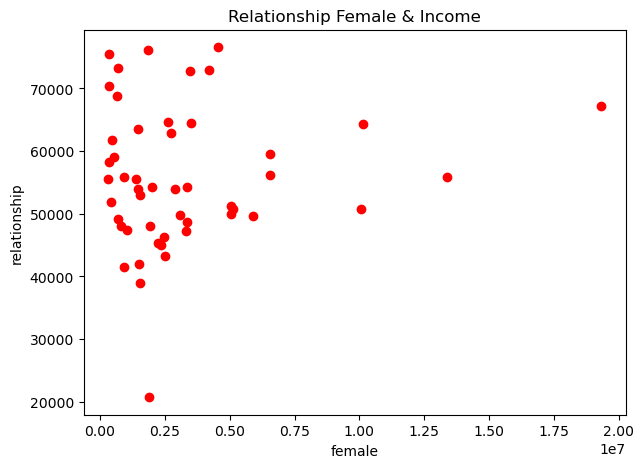

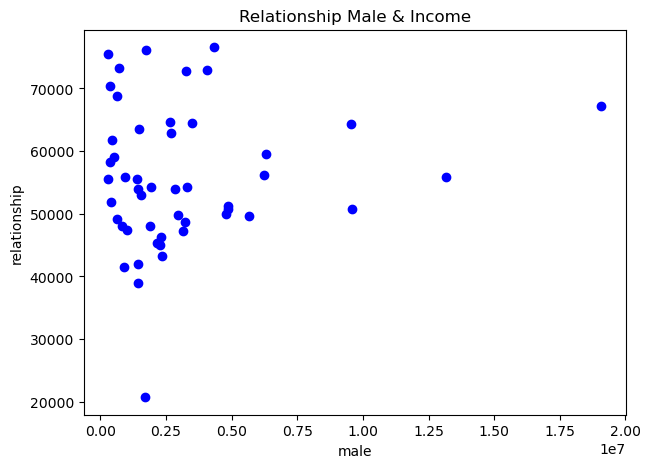

In [53]:
plt.figure(figsize=(7,5))
plt.scatter(us_census['female'], us_census['income'], color = 'red')
plt.title('Relationship Female & Income')
plt.xlabel('female')
plt.ylabel('relationship')
plt.show()

plt.figure(figsize=(7,5))
plt.scatter(us_census['male'], us_census['income'], color = 'blue')
plt.title('Relationship Male & Income')
plt.xlabel('male')
plt.ylabel('relationship')
plt.show()

## Histogram of Races

13. Now your boss wants you to make a bunch of histograms out of the race data that you have. Look at the `.columns` again to see what the race categories are.

In [55]:
us_census.columns

Index(['state', 'totalpop', 'hispanic', 'white', 'black', 'native', 'asian',
       'pasific', 'income', 'male', 'female'],
      dtype='object')

14. Try to make a histogram for each one!

    You will have to get the columns into the numerical format, and those percentage signs will have to go.
    
    Don't forget to fill the `nan` values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn't hurt to check for duplicates again.

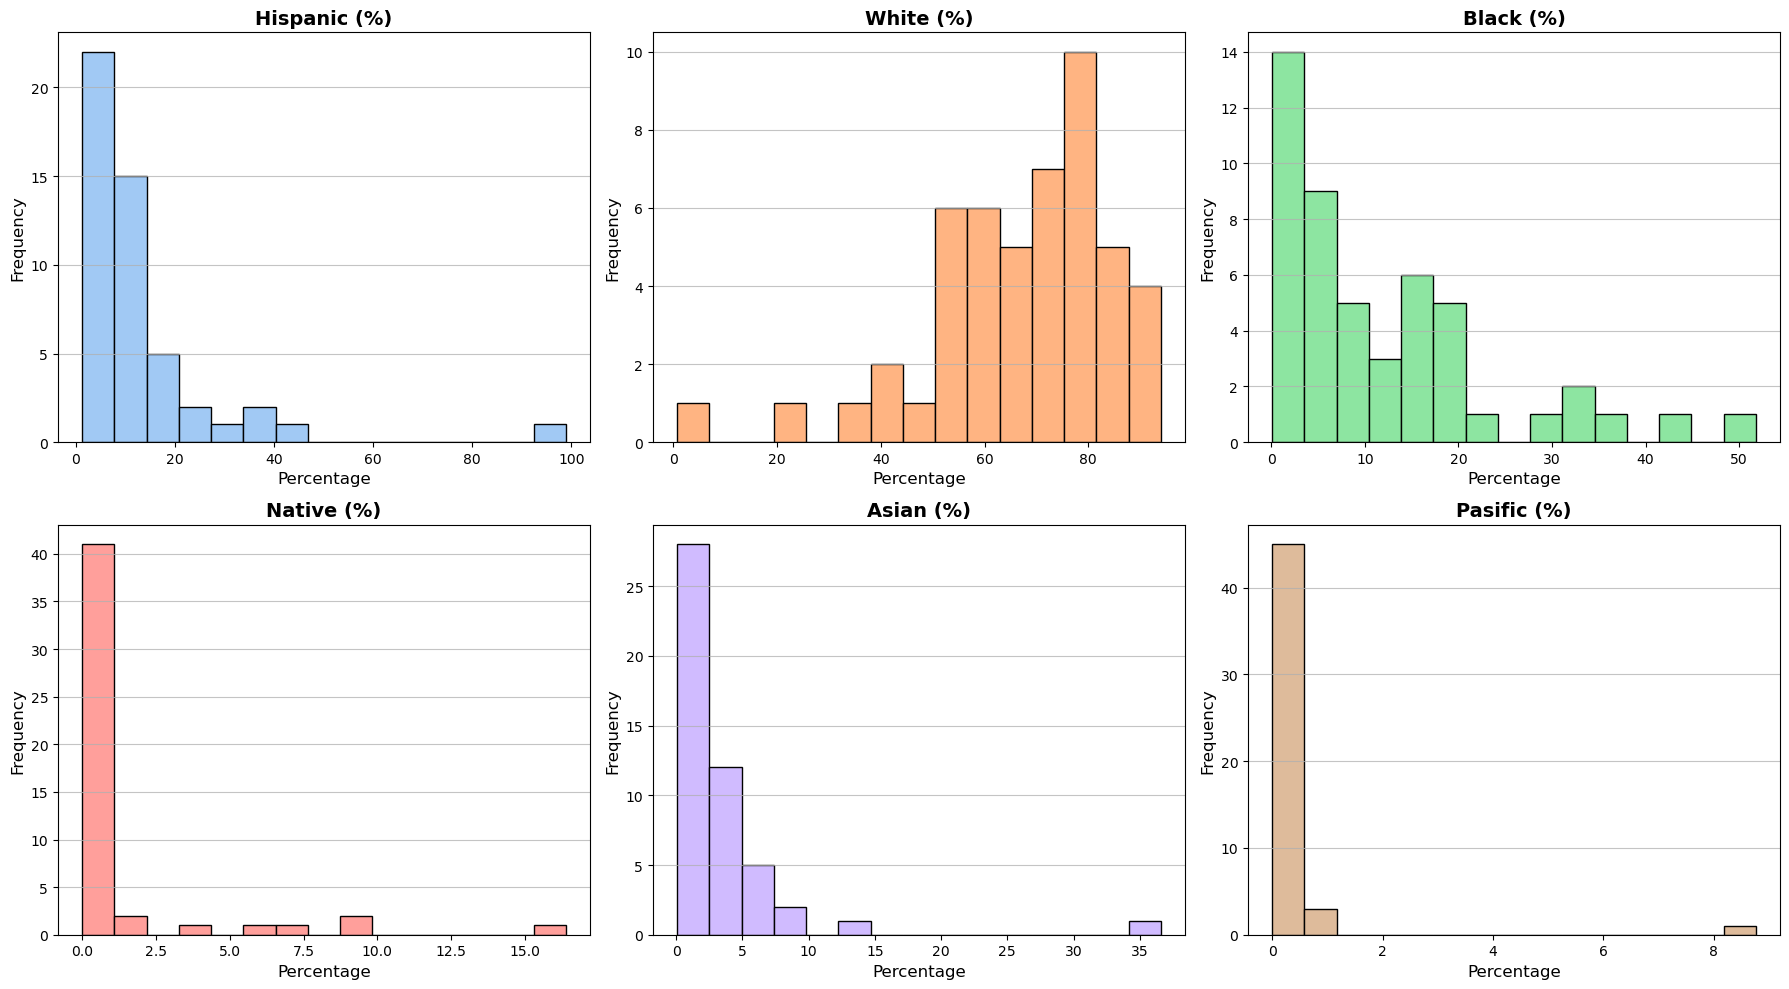

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns  # seaborn estetik grafikler için

etnics = ['hispanic', 'white', 'black', 'native', 'asian', 'pasific']
colors = sns.color_palette("pastel", len(etnics))  # pastel colors

fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows, 3 columns
axes = axes.flatten()  # easy iteration

for i, etnic in enumerate(etnics):
    axes[i].hist(census[etnic].dropna(), bins=15, color=colors[i], edgecolor='black')
    axes[i].set_title(f"{etnic.capitalize()} (%)", fontsize=14, weight='bold')
    axes[i].set_xlabel("Percentage", fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].grid(axis='y', alpha=0.75)  # y grid

plt.tight_layout()  # grafikler arasında iyi boşluk bırakır
plt.show()

## Get Creative

15. Phew. You've definitely impressed your boss on your first day of work.

    But is there a way you really convey the power of pandas and Python over the drudgery of `csv` and Excel?
    
    Try to make some more interesting graphs to show your boss, and the world! You may need to clean the data even more to do it, or the cleaning you have already done may give you the ease of manipulation you've been searching for.